In [95]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.linear_model import Ridge,Lasso
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [114]:
calschool = pd.read_csv("carschool/Caschool.csv")


In [115]:
calschool.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [116]:
''' 1.1 Visualize the univariate distribution of the target feature and each of the three continuous
  
    explanatory variables that you think are likely to have a relationship with the target feature.

'''


' 1.1 Visualize the univariate distribution of the target feature and each of the three continuous\n  \n    explanatory variables that you think are likely to have a relationship with the target feature.\n\n'

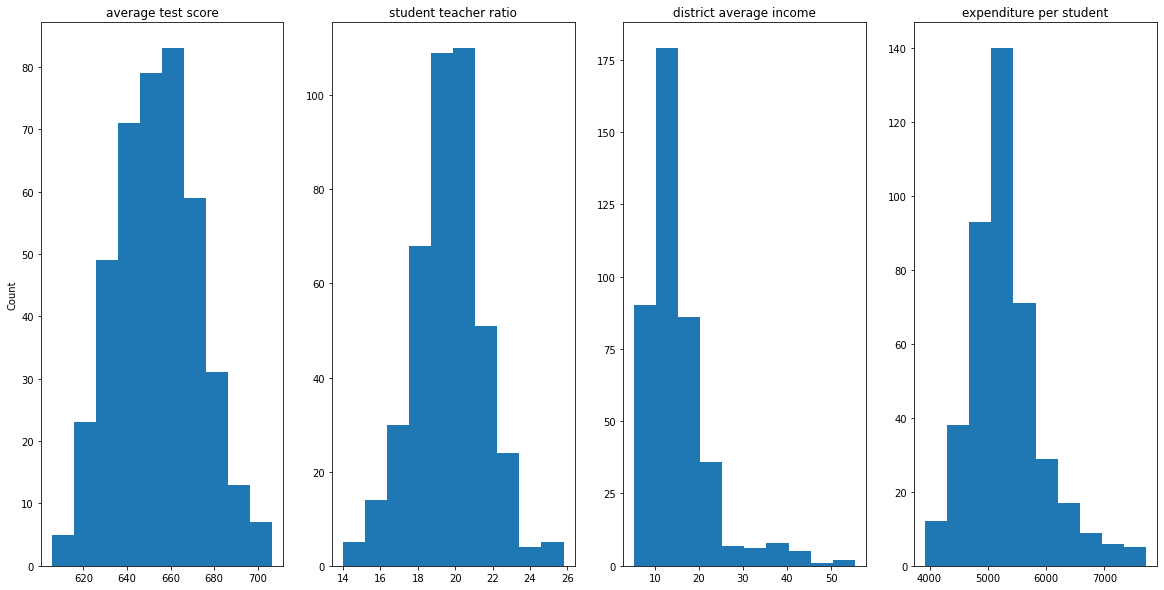

In [117]:
# https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Caschool.html

fig, ax = plt.subplots(1, 4, figsize = (20, 10))

ax[0].hist(calschool["testscr"])
ax[0].set_ylabel("Count")
ax[0].set_title("average test score")


ax[1].hist(calschool["str"])
ax[1].set_title("student teacher ratio")

ax[2].hist(calschool["avginc"])
ax[2].set_title("district average income")

ax[3].hist(calschool["expnstu"])
ax[3].set_title("expenditure per student")

plt.show()

In [118]:
''' 

1.2 Visualize the dependency of the target on each feature from 1.1.

'''

' \n\n1.2 Visualize the dependency of the target on each feature from 1.1.\n\n'

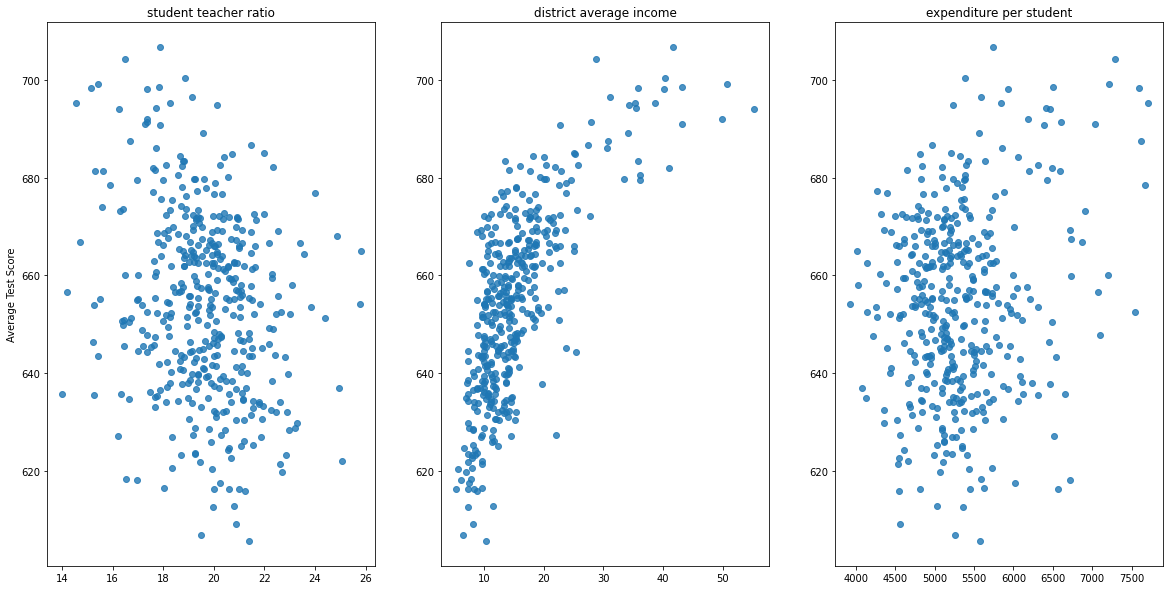

In [119]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10))



ax[0].scatter(calschool["str"], calschool["testscr"], alpha = 0.8)
ax[0].set_ylabel("Average Test Score")
ax[0].set_title("student teacher ratio")

ax[1].scatter(calschool["avginc"], calschool["testscr"], alpha = 0.8)
ax[1].set_title("district average income")

ax[2].scatter(calschool["expnstu"], calschool["testscr"], alpha = 0.8)
ax[2].set_title("expenditure per student")

plt.show()

In [120]:
''' 

1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters.
Does scaling the data with the StandardScaler help?

'''

' \n\n1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters.\nDoes scaling the data with the StandardScaler help?\n\n'

In [121]:

calschool = calschool._get_numeric_data() #only keeps numeric data
calschool = calschool.iloc[:, 2:13] #select out first column, redundant row number

y = calschool['testscr'] 
X = calschool.loc[:, calschool.columns != 'testscr'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, y)

In [122]:
kfold = KFold(n_splits=5)

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test) 
print("KFold CV Train Score: {}".format(mean(cross_val_score(KNeighborsRegressor(), X_train, Y_train, cv=kfold))))
print("KFold CV Test Score: {}".format(mean(cross_val_score(KNeighborsRegressor(), X_test, Y_test, cv=kfold))))
print("KNN Mean Squared Error:", mean_squared_error(Y_test, y_pred_knn))
print('\n')

lr = LinearRegression().fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

print("LinearRegression CV Train Score: {:.2f}".format( np.mean(cross_val_score(LinearRegression(), 
                                                                                X_train, Y_train, cv=10, scoring="r2"))))
print("LinearRegression CV Test Score: {:.2f}".format( np.mean(cross_val_score(LinearRegression(),
                                                                               X_test, Y_test, cv=10, scoring="r2"))))
print("LinearRegression Mean Squared Error:", mean_squared_error(Y_test, y_pred_lr))

print('\n')
ridge = Ridge().fit(X_train, Y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge CV Train Score: {:.2f}".format( np.mean(cross_val_score(Ridge(), X_train, Y_train, scoring="r2"))))
print("Ridge CV Test Score: {:.2f}".format( np.mean(cross_val_score(Ridge(), X_test, Y_test, scoring="r2"))))
print("Ridge Mean Squared Error:", mean_squared_error(Y_test, y_pred_ridge))

print('\n')
print("Lasso CV Train Score: {:.2f}".format( np.mean(cross_val_score(Lasso(), X_train, Y_train, scoring="r2"))))
print("Lasso CV Test Score: {:.2f}".format( np.mean(cross_val_score(Lasso(), X_test, Y_test, scoring="r2"))))
lasso = Lasso().fit(X_train, Y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Mean Squared Error:", mean_squared_error(Y_test, y_pred_lasso))

KFold CV Train Score: -0.032829596490717636
KFold CV Test Score: -0.02386954899741085
KNN Mean Squared Error: 424.2088463801161


LinearRegression CV Train Score: 0.78
LinearRegression CV Test Score: 0.76
LinearRegression Mean Squared Error: 73.40702421471237


Ridge CV Train Score: 0.79
Ridge CV Test Score: 0.79
Ridge Mean Squared Error: 73.77120514223496


Lasso CV Train Score: 0.79
Lasso CV Test Score: 0.80
Lasso Mean Squared Error: 73.33831456482207


In [123]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('\n After StandardScaler changed  \n')
lr = LinearRegression().fit(X_train_scaled, Y_train)
print("LinearRegression CV Train Score: {:.2f}".format( np.mean(cross_val_score(lr, X_train_scaled, Y_train, scoring="r2"))))
print("LinearRegression CV Test Score: {:.2f}".format( np.mean(cross_val_score(lr, X_test_scaled, Y_test, scoring="r2"))))


ridge = Ridge().fit(X_train_scaled, Y_train)
print("Ridge CV Train Score: {:.2f}".format( np.mean(cross_val_score(ridge, X_train_scaled, Y_train, scoring="r2"))))
print("Ridge CV Test Score: {:.2f}".format( np.mean(cross_val_score(ridge, X_test_scaled, Y_test, scoring="r2"))))
    
lasso = Lasso().fit(X_train_scaled, Y_train)
print("Lasso CV Train Score: {:.2f}".format( np.mean(cross_val_score(lasso, X_train_scaled, Y_train, scoring="r2"))))
print("Lasso CV Test Score: {:.2f}".format( np.mean(cross_val_score(lasso, X_test_scaled, Y_test, scoring="r2"))))




 After StandardScaler changed  

LinearRegression CV Train Score: 0.79
LinearRegression CV Test Score: 0.79
Ridge CV Train Score: 0.79
Ridge CV Test Score: 0.79
Lasso CV Train Score: 0.79
Lasso CV Test Score: 0.79


In [124]:
print('LinearRegression and Lasson Test score improved!')

LinearRegression and Lasson Test score improved!


In [125]:
'''
1.4 Tune the parameters of the models where possible using GridSearchCV. 
Do the results improve?
'''

'\n1.4 Tune the parameters of the models where possible using GridSearchCV. \nDo the results improve?\n'

In [131]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
# print(knn_pipe.steps) 
# Name of step = 'kneighborsregressor' + __ + n_neighbors

knn_param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)} # remember, use two underscores before n, "__n"
knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=kfold).fit(X_train_scaled, Y_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(knn_grid.score(X_test_scaled, Y_test)))
print("Best Parameter: {}".format(knn_grid.best_params_))

print('\n')
knn = KNeighborsRegressor(n_neighbors=6).fit(X_train_scaled, Y_train)
best_knn = knn.score(X_test_scaled, Y_test)
print("KNN Test set score: {:.2f}".format(best_knn))

print('\n')
ridge_pipe = make_pipeline(StandardScaler(), Ridge())
ridge_param_grid = {'ridge__alpha': np.linspace(0.1, 100.0, 1)}
ridge_grid = GridSearchCV(ridge_pipe, ridge_param_grid, cv=kfold).fit(X_train_scaled, Y_train)

print("RIDGE Regression (SCALED DATA)")
print("Test set Score: {:.2f}".format(ridge_grid.score(X_test_scaled, Y_test)))
print("Best Parameter: {}".format(ridge_grid.best_params_))

lasso_pipe = make_pipeline(StandardScaler(), Lasso())


lasso_param_grid = {'lasso__alpha': np.linspace(0.1, 100.0, 1)}
lasso_grid = GridSearchCV(lasso_pipe, lasso_param_grid, cv=kfold).fit(X_train_scaled, Y_train)

print("LASSO REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(lasso_grid.score(X_test_scaled, Y_test)))
print("Best Parameter: {}".format(lasso_grid.best_params_))

KNN for REGRESSION (SCALED DATA)
Test set Score: 0.75
Best Parameter: {'kneighborsregressor__n_neighbors': 9}


KNN Test set score: 0.74


RIDGE Regression (SCALED DATA)
Test set Score: 0.82
Best Parameter: {'ridge__alpha': 0.1}
LASSO REGRESSION (SCALED DATA)
Test set Score: 0.82
Best Parameter: {'lasso__alpha': 0.1}


In [132]:
print('all show some improvement after using GridSearchCV ')

all show some improvement after using GridSearchCV 


In [133]:
'''
1.5 Compare the coefficients of your two best linear models (not knn), 
do they agree on which features are important?
'''

'\n1.5 Compare the coefficients of your two best linear models (not knn), \ndo they agree on which features are important?\n'

In [138]:
d = {'LASSO': lasso.coef_, 'Ridge': ridge.coef_} # Builds a dictionary with the coefficients from my LASSO & Ridge models
coefficients = pd.DataFrame(data=d, index=X.columns) # Puts the dictionary into a dataframe along with variable names
t = coefficients.head(10)
print(t)
print('LASSO and Ridge agree on which features are important!')
print('\n')
print("Number of features used with LASSO: {}".format(np.sum(lasso.coef_ != 0)))
print("Number of features used with Ridge: {}".format(np.sum(ridge.coef_ != 0)))

              LASSO      Ridge
enrltot   -0.000000   1.424442
teachers  -0.000000  -1.721406
calwpct   -0.000000  -0.540525
mealpct  -10.861955 -10.515554
computer  -0.000000   0.572952
compstu    0.028817   0.401862
expnstu    0.491414   1.021033
str       -0.262553  -0.734400
avginc     3.649008   3.962487
elpct     -2.702536  -3.526590
LASSO and Ridge agree on which features are important!


Number of features used with LASSO: 6
Number of features used with Ridge: 10


In [139]:
'''
1.6 Discuss which final model you would choose to predict new data
'''

'\n\n'

In [140]:
print('I will use LASSO with GridSearchCV')

I will use LASSO with GridSearchCV


In [142]:
print('#'*20, 'Part 2: Classification on red and white wine characteristics', '#'*20)

#################### Part 2: Classification on red and white wine characteristics ####################
